In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

import warnings
warnings.filterwarnings("ignore")

# Tu código aquí


In [258]:
#Leyendo DataSets
# Optimización de la lectura de los datasets, eliminando la columna 'Unnamed: 0' directamente
df_1 = pd.read_csv("./estadisticas_peleador_limpio.csv", index_col=0)
df_2 = pd.read_csv("./Enfrentamientos_limpio.csv", index_col=0)
df_3 = pd.read_csv("./Categorias_por_peso.csv", index_col=0)



In [259]:
df_1.head()


,Nombre,Pais,Victorias,Derrotas,Altura,Peso,Alcance,Guardia,Edad,Golpes_min,Golpes_acer,Golpes_abs,Golpes_def,Derribos_med,Derribos_acer,Derribos_def,Sumision_int
0,Amanda Ribas,Brasil,12.0,5.0,160.02,56.70,167.64,Ortodoxo,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,Estados Unidos,13.0,6.0,165.10,56.70,165.10,Ortodoxo,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Justin Tafa,Nueva Zelanda,7.0,4.0,182.88,119.75,187.96,Zurdo,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
3,Edmen Shahbazyan,Estados Unidos,13.0,4.0,187.96,83.91,190.50,Ortodoxo,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6
4,Payton Talbott,Estados Unidos,8.0,0.0,177.80,61.23,177.80,Ambidiestro,25.0,8.05,0.54,3.58,0.51,0.00,0.00,0.90,0.5


In [260]:
df_2.head()

,Evento,Día,Donde,Ganador,Perdedor,Division,Metodo,Detalles,Round,Tiempo
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,Peso Medio,KO/TKO,Golpes,1.0,4:33
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,Peso Gallo,KO/TKO,Golpes,2.0,0:21
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,Peso Pluma,SUB,Estrangulación Trasera,2.0,1:50
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Fernando Padilla,Luis Pajuelo,Peso Pluma,SUB,Estrangulación D'Arce,1.0,2:45
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Julian Erosa,Ricardo Ramos,Peso Pluma,SUB,Estrangulación Guillotina,1.0,2:15


In [261]:
df_3.head()

,Division,Peso (kg)
0,Peso Medio,Hasta 84 kg
1,Peso Gallo,Hasta 61.2 kg
2,Peso Pluma,Hasta 65.8 kg
3,Peso Pesado,Hasta 120.2 kg
4,Peso Gallo,Hasta 61.2 kg




 <span style="color:red">1. Relación entre la guardia y el Éxito en ambos géneros 🤼</span>.

In [262]:
df_1_filtro = df_1[['Nombre', 'Guardia']]
df_2_filtro = df_2[['Ganador', 'Perdedor']]

In [263]:
ganadores = pd.merge(df_2_filtro, df_1_filtro, left_on='Ganador', right_on='Nombre', how='left')  #Merge
ganadores = ganadores[['Ganador', 'Guardia']].rename(columns={'Guardia': 'Guardia_ganador'})      #Cambiar nombre

perdedores = pd.merge(df_2_filtro, df_1_filtro, left_on='Perdedor', right_on='Nombre', how='left') #Merge
perdedores = perdedores[['Perdedor', 'Guardia']].rename(columns={'Guardia': 'Guardia_perdedor'})   #Cambiar nombre

df_combinado = pd.merge(ganadores, perdedores, left_index=True, right_index=True)                             #Combinar
df_combinado = df_combinado.dropna(subset=['Ganador', 'Guardia_ganador', 'Perdedor', 'Guardia_perdedor'])     #Eliminar NaN's

df_combinado

,Ganador,Guardia_ganador,Perdedor,Guardia_perdedor
1,Payton Talbott,Ambidiestro,Cameron Saaiman,Zurdo
2,Youssef Zalal,Ambidiestro,Billy Quarantillo,Ortodoxo
4,Julian Erosa,Zurdo,Ricardo Ramos,Ortodoxo
5,Marcin Tybura,Ortodoxo,Tai Tuivasa,Zurdo
6,Macy Chiasson,Ortodoxo,Pannie Kianzad,Ortodoxo
...,...,...,...,...
3015,Jon Jones,Ortodoxo,Brandon Vera,Ortodoxo
3070,Vitor Belfort,Zurdo,Rich Franklin,Zurdo
3078,Nate Diaz,Zurdo,Melvin Guillard,Ortodoxo
3177,Jeremy Stephens,Ortodoxo,Rafael Dos Anjos,Zurdo


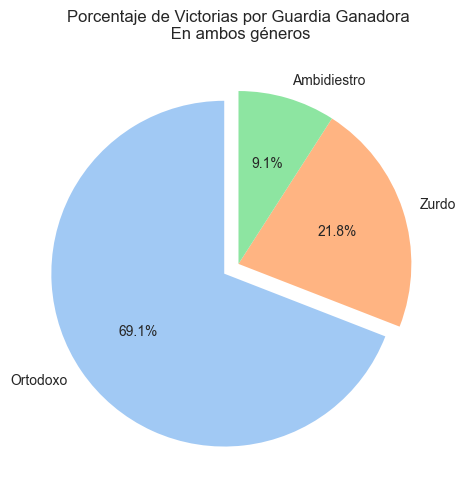

In [264]:
contador_guardias = df_combinado['Guardia_ganador'].value_counts()

porcentajes_guardias = (contador_guardias / contador_guardias.sum()) * 100

plt.figure(figsize=(5, 5))
plt.pie(porcentajes_guardias, labels=porcentajes_guardias.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'),explode=(0.1, 0, 0))
plt.title("Porcentaje de Victorias por Guardia Ganadora\n En ambos géneros")

plt.tight_layout()
plt.show()



#Dato Curioso: La prevalencia de zurdos en el mundo es del 10,6 %,



 <span style="color:red">2. Probabilidad de ganar respecto a una buena defensa de derribo? 🥋</span>.

In [265]:
df_1_filtro = df_1[['Victorias', 'Derrotas','Derribos_def']]

In [266]:
df_1_filtro.loc[:,'Total_Peleas'] = df_1_filtro['Victorias'] + df_1_filtro['Derrotas']
df_1_filtro.loc[:,'Probabilidad_Ganar'] = df_1_filtro['Victorias'] / df_1_filtro['Total_Peleas']

umbral_defensa = 0.6                                            
df_buena_defensa = df_1_filtro[df_1_filtro['Derribos_def'] >= umbral_defensa]

probabilidad_promedio_ganar = df_buena_defensa['Probabilidad_Ganar'].mean()
print(f"Probabilidad promedio de ganar con buena defensa de derribos: {(round(probabilidad_promedio_ganar,2))*100} %")


#visibilizar con densiti

Probabilidad promedio de ganar con buena defensa de derribos: 75.0 %



 <span style="color:red">3. Diferencia de Edades 👵👦</span>.
4. Diferencia de Edades 👵👦


In [267]:

ganadores = df_2[['Ganador']].merge(df_1[['Nombre', 'Edad']], left_on='Ganador', right_on='Nombre', how='left')
ganadores.rename(columns={'Edad': 'Edad_Ganador'}, inplace=True)

perdedores = df_2[['Perdedor']].merge(df_1[['Nombre', 'Edad']], left_on='Perdedor', right_on='Nombre', how='left')
perdedores.rename(columns={'Edad': 'Edad_Perdedor'}, inplace=True)

resultados = pd.concat([ganadores, perdedores], axis=1)
resultados = resultados[['Ganador', 'Edad_Ganador', 'Perdedor', 'Edad_Perdedor']]

resultados_limpios = resultados.dropna()
resultados_limpios



edad_ganadores = resultados_limpios['Edad_Ganador'].median()
edad_perdedores = resultados_limpios['Edad_Perdedor'].median()

print(f'Edad promedio de los ganadores: {edad_ganadores:.2f}')
print(f'Edad promedio de los perdedores: {edad_perdedores:.2f}')

Edad promedio de los ganadores: 33.00
Edad promedio de los perdedores: 34.00


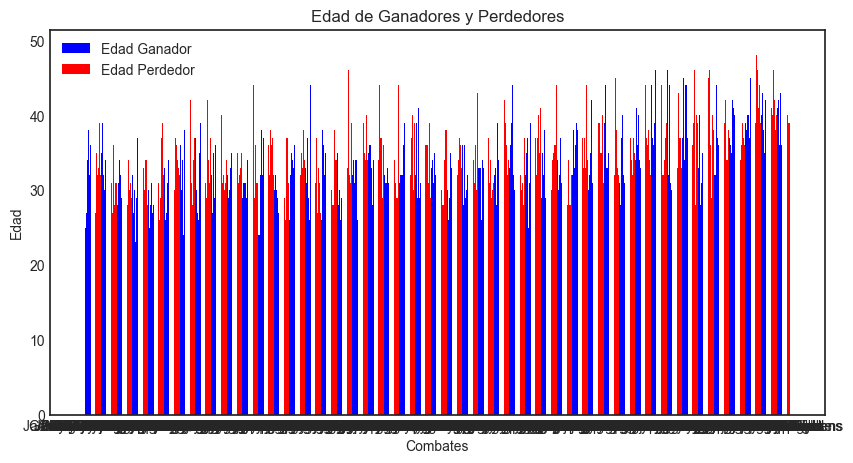

In [268]:
## Gráfico de barras para las edades de ganadores y perdedores
plt.figure(figsize=(10, 5))
bar_width = 0.35
x = range(len(resultados_limpios))

# Graficar las edades de los ganadores
plt.bar(x, resultados_limpios['Edad_Ganador'], width=bar_width, label='Edad Ganador', color='blue')
# Graficar las edades de los perdedores
plt.bar([p + bar_width for p in x], resultados_limpios['Edad_Perdedor'], width=bar_width, label='Edad Perdedor', color='red')

plt.xlabel('Combates')
plt.ylabel('Edad')
plt.title('Edad de Ganadores y Perdedores')
plt.xticks([p + bar_width / 2 for p in x], resultados_limpios['Ganador'])
plt.legend()
plt.show()


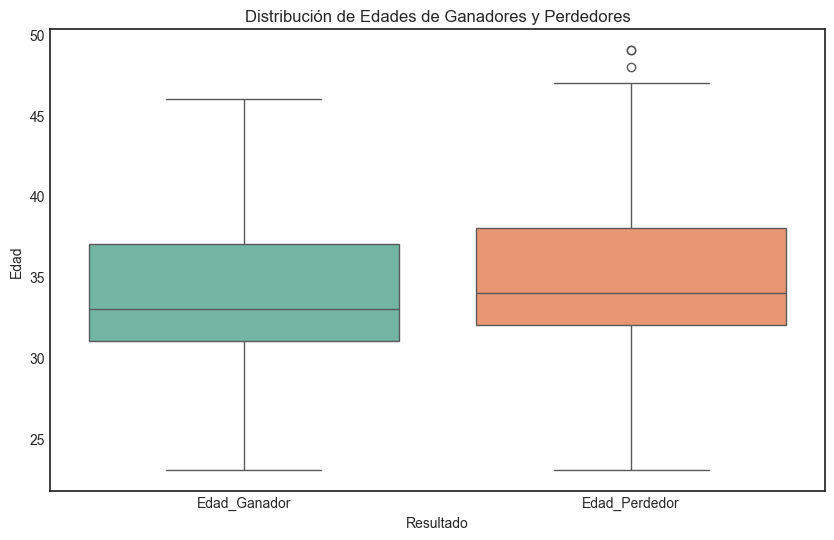

In [269]:
# Preparar los datos para el boxplot
data_boxplot = pd.melt(resultados_limpios, id_vars=['Ganador', 'Perdedor'], value_vars=['Edad_Ganador', 'Edad_Perdedor'],
                        var_name='Resultado', value_name='Edad')

# Gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='Resultado', y='Edad', data=data_boxplot, palette='Set2')
plt.title('Distribución de Edades de Ganadores y Perdedores')
plt.xlabel('Resultado')
plt.ylabel('Edad')
plt.show()






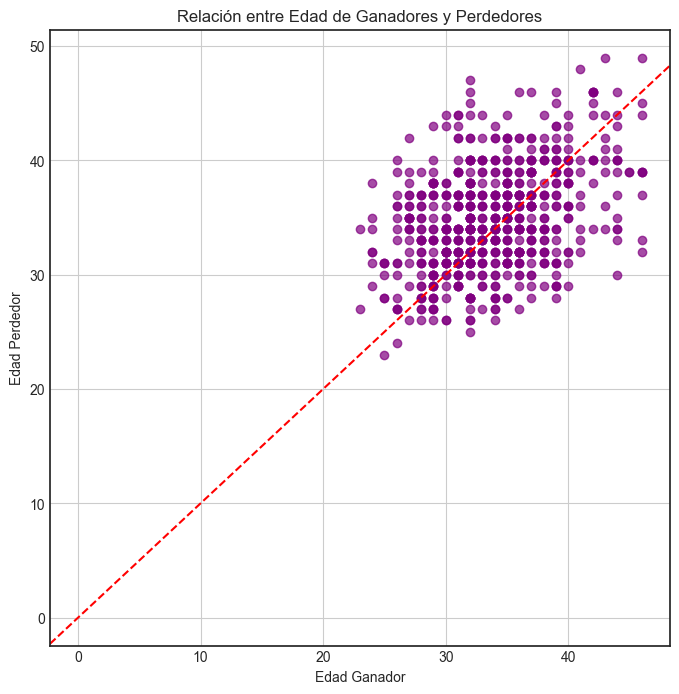

In [270]:
# Gráfico de dispersión
plt.figure(figsize=(8, 8))
plt.scatter(resultados_limpios['Edad_Ganador'], resultados_limpios['Edad_Perdedor'], color='purple', alpha=0.7)
plt.title('Relación entre Edad de Ganadores y Perdedores')
plt.xlabel('Edad Ganador')
plt.ylabel('Edad Perdedor')
plt.grid(True)
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Línea de igualdad
plt.show()


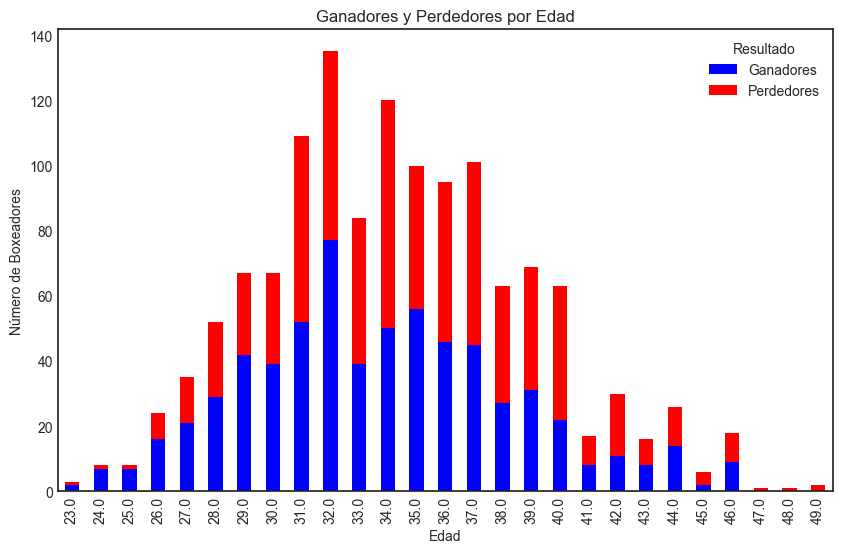

In [271]:
# Agrupando los datos por edad
edades = pd.DataFrame({
    'Ganadores': resultados_limpios['Edad_Ganador'].value_counts(),
    'Perdedores': resultados_limpios['Edad_Perdedor'].value_counts()
}).fillna(0)

edades = edades.reset_index()
edades.columns = ['Edad', 'Ganadores', 'Perdedores']

# Gráfico de barras apiladas
edades.set_index('Edad').plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])
plt.title('Ganadores y Perdedores por Edad')
plt.xlabel('Edad')
plt.ylabel('Número de Boxeadores')
plt.legend(title='Resultado')
plt.show()


 <span style="color:red">4. Probabilidad de ganar por kO con golpes en cualquier division</span>.


In [272]:
df_2_filtro = df_2[["Ganador","Division","Metodo","Detalles"]]


In [273]:
division_concreta = 'Peso Pesado'

conteo = df_2_filtro[df_2_filtro['Division'] == division_concreta].shape[0]
print(f"Número de peleadores en {division_concreta}: {conteo}")



Número de peleadores en Peso Pesado: 447


In [274]:
dict_golpes = {
    "Punches": "Golpes",
    "Kick": "Patada",
    "Punch": "Puño",
    "Elbows": "Codos",
    "Elbow": "Codo",
    "Flying Knee": "Rodilla Voladora",
    "Knees": "Rodillas",
    "Knee": "Rodilla",
    "Kicks": "Patadas",
    "Spinning Back Kick": "Patada Circular",
    "Spinning Back Fist": "Puñetazo Circular",
    "Spinning Back Elbow": "Codazo Circular",
    "Headbutts": "Cabezazos",
    "Slam": "Golpe Bajo"
}

golpes_list = list(dict_golpes.values())

df_ko_golpes = df_2_filtro[
    (df_2_filtro['Metodo'] == 'KO/TKO') & 
    (df_2_filtro['Detalles'].str.contains('|'.join(golpes_list), na=False))
]
conteo_ko_por_division = df_ko_golpes['Division'].value_counts()
conteo_ko_por_division

Division
Peso Welter          385
Peso Medio           351
Peso Pesado          351
Peso Ligero          349
Peso Semipesado      276
Peso Gallo           222
Peso Pluma           195
Peso Mosca           107
Peso Paja             38
Peso Abierto          36
Peso Pactado          18
Peso Super Pesado      1
Name: count, dtype: int64

In [275]:
conteo_ko_por_division = df_ko_golpes['Division'].value_counts()
conteo_ko_por_division

Division
Peso Welter          385
Peso Medio           351
Peso Pesado          351
Peso Ligero          349
Peso Semipesado      276
Peso Gallo           222
Peso Pluma           195
Peso Mosca           107
Peso Paja             38
Peso Abierto          36
Peso Pactado          18
Peso Super Pesado      1
Name: count, dtype: int64

In [276]:
conteo_total_por_division = df_2_filtro['Division'].value_counts()
conteo_total_por_division

Division
Peso Ligero          640
Peso Welter          626
Peso Medio           569
Peso Pesado          447
Peso Semipesado      385
Peso Gallo           385
Peso Pluma           323
Peso Mosca           223
Peso Paja             97
Peso Abierto          75
Peso Pactado          33
Peso Super Pesado      1
Name: count, dtype: int64

In [277]:
probabilidad_ko = conteo_ko_por_division / conteo_total_por_division
probabilidad_ko.sort_values(ascending = False)

Division
Peso Super Pesado    1.000000
Peso Pesado          0.785235
Peso Semipesado      0.716883
Peso Medio           0.616872
Peso Welter          0.615016
Peso Pluma           0.603715
Peso Gallo           0.576623
Peso Pactado         0.545455
Peso Ligero          0.545312
Peso Abierto         0.480000
Peso Mosca           0.479821
Peso Paja            0.391753
Name: count, dtype: float64

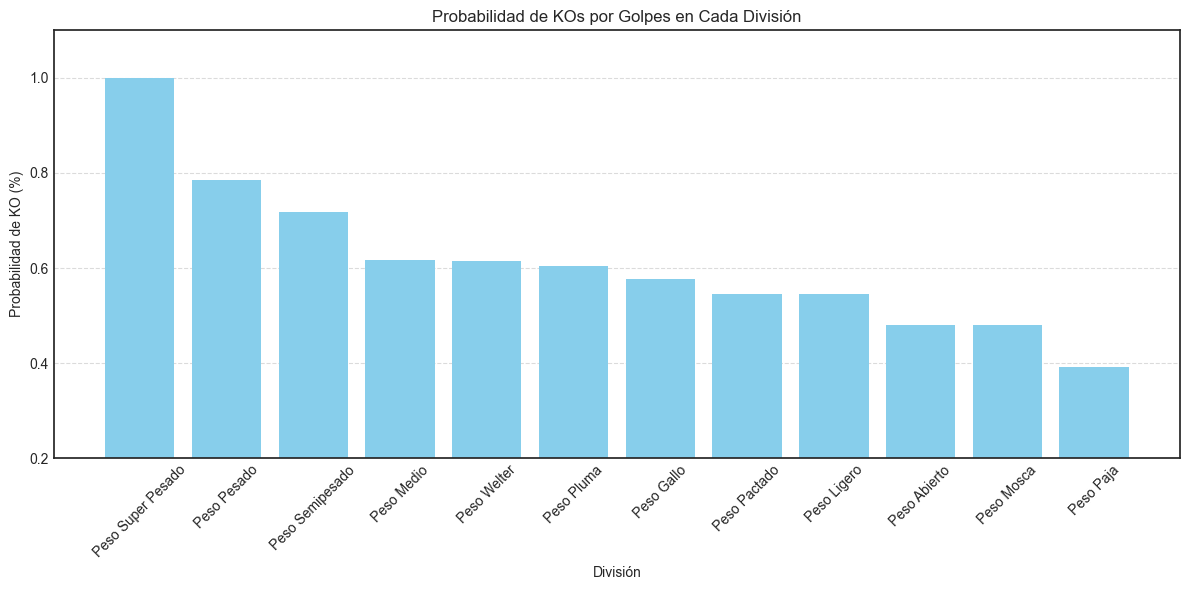

In [278]:
plt.figure(figsize=(12, 6))

probabilidad_ko = probabilidad_ko.sort_values(ascending = False)

plt.bar(probabilidad_ko.index, probabilidad_ko, color='skyblue',)
plt.title('Probabilidad de KOs por Golpes en Cada División')
plt.xlabel('División')
plt.ylabel('Probabilidad de KO (%)')
plt.xticks(rotation=45)
plt.ylim(0.2, 1.1)
plt.axhline(0, color='black', lw=0.8)  # Línea en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de cuadrícula
plt.tight_layout()
plt.show()


 <span style="color:red">5. EXTRA: Altura y Resultados de Pelea 📏🏆</span>.

quiero saber si gana una persona mas alta que baja, y que importancia tiene el alcance(embergadura)
Del 1er dataset: ALtura, Alcance, Victorias
del 2do dataset: Ganador Perdedor
y presentarlo en un grafico (dame varias opciones)

In [281]:
# Obtener las alturas y alcances de los ganadores
ganadores = df_2[['Ganador']].merge(df_1[['Nombre', 'Altura', 'Alcance', 'Victorias']], 
                                     left_on='Ganador', right_on='Nombre', how='left')
ganadores.rename(columns={'Altura': 'Altura_Ganador', 'Alcance': 'Alcance_Ganador', 'Victorias': 'Victorias_Ganador'}, inplace=True)

# Obtener las alturas y alcances de los perdedores
perdedores = df_2[['Perdedor']].merge(df_1[['Nombre', 'Altura', 'Alcance', 'Victorias']], 
                                       left_on='Perdedor', right_on='Nombre', how='left')
perdedores.rename(columns={'Altura': 'Altura_Perdedor', 'Alcance': 'Alcance_Perdedor', 'Victorias': 'Victorias_Perdedor'}, inplace=True)

# Combinar ambas DataFrames
resultados = pd.concat([ganadores, perdedores], axis=1)
resultados = resultados[['Ganador', 'Altura_Ganador', 'Alcance_Ganador', 'Victorias_Ganador',
                         'Perdedor', 'Altura_Perdedor', 'Alcance_Perdedor', 'Victorias_Perdedor']]

# Mostrar el resultado
resultados_limpios = resultados.dropna()
print(resultados_limpios)


              Ganador  Altura_Ganador  Alcance_Ganador  Victorias_Ganador  \
1      Payton Talbott          177.80           177.80                8.0   
2       Youssef Zalal          177.80           182.88               14.0   
4        Julian Erosa          185.42           187.96               29.0   
5       Marcin Tybura          190.50           198.12               25.0   
6       Macy Chiasson          180.34           182.88               10.0   
...               ...             ...              ...                ...   
3015        Jon Jones          193.04           213.36               27.0   
3070    Vitor Belfort          182.88           187.96               26.0   
3078        Nate Diaz          182.88           193.04               22.0   
3177  Jeremy Stephens          175.26           180.34               28.0   
3274  Jeremy Stephens          175.26           180.34               28.0   

               Perdedor  Altura_Perdedor  Alcance_Perdedor  Victorias_Perde

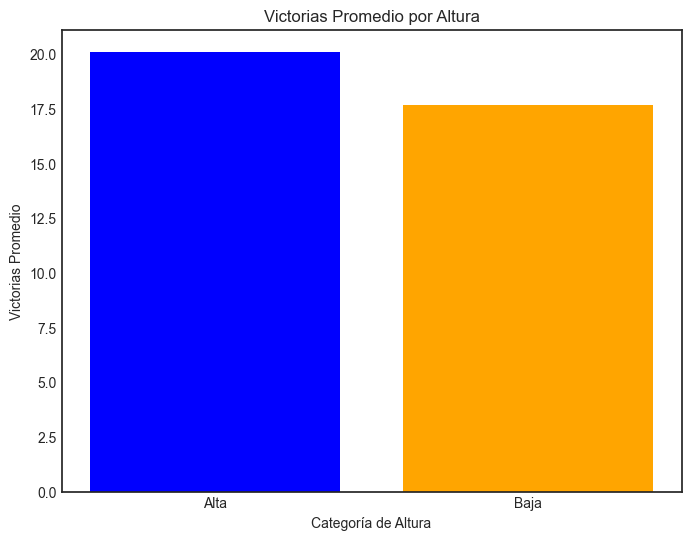

In [282]:
import matplotlib.pyplot as plt

# Definir una categoría para alta y baja
resultados_limpios['Altura_Categoria'] = resultados_limpios['Altura_Ganador'].apply(lambda x: 'Alta' if x >= 180 else 'Baja')

# Calcular victorias promedio
victorias_promedio = resultados_limpios.groupby('Altura_Categoria')['Victorias_Ganador'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(victorias_promedio['Altura_Categoria'], victorias_promedio['Victorias_Ganador'], color=['blue', 'orange'])
plt.title('Victorias Promedio por Altura')
plt.xlabel('Categoría de Altura')
plt.ylabel('Victorias Promedio')
plt.show()


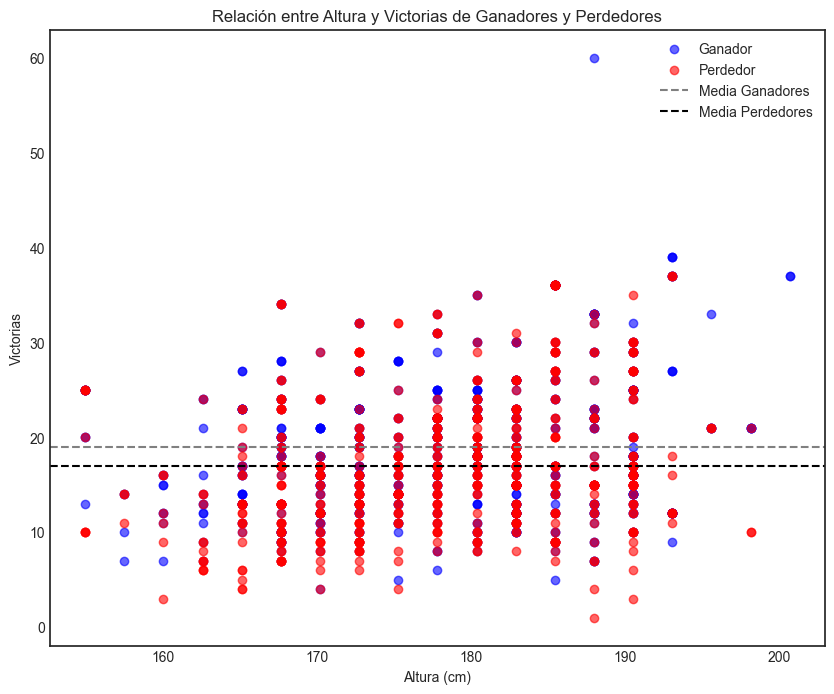

In [283]:
# Gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(resultados_limpios['Altura_Ganador'], resultados_limpios['Victorias_Ganador'], 
            color='blue', label='Ganador', alpha=0.6)
plt.scatter(resultados_limpios['Altura_Perdedor'], resultados_limpios['Victorias_Perdedor'], 
            color='red', label='Perdedor', alpha=0.6)

plt.title('Relación entre Altura y Victorias de Ganadores y Perdedores')
plt.xlabel('Altura (cm)')
plt.ylabel('Victorias')
plt.axhline(y=resultados_limpios['Victorias_Ganador'].mean(), color='gray', linestyle='--', label='Media Ganadores')
plt.axhline(y=resultados_limpios['Victorias_Perdedor'].mean(), color='black', linestyle='--', label='Media Perdedores')
plt.legend()
plt.show()


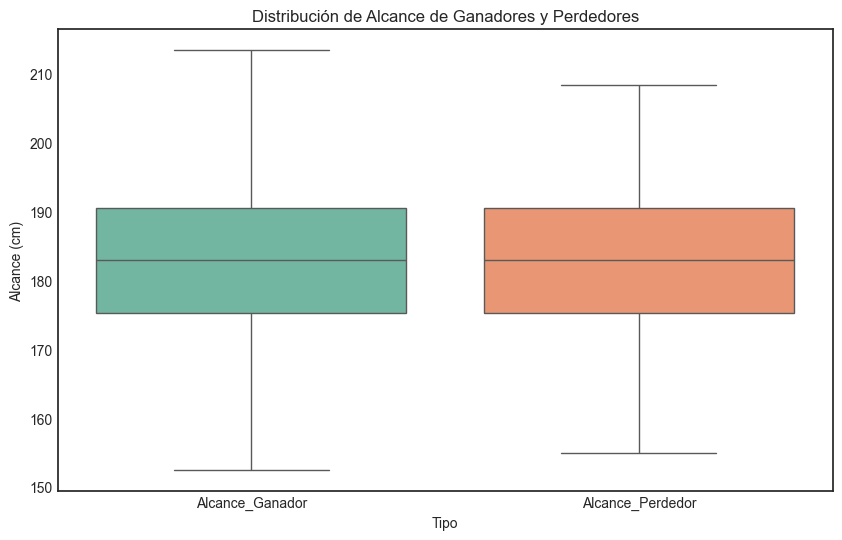

In [284]:
# Preparar datos para boxplot
data_boxplot = pd.melt(resultados_limpios, id_vars=['Ganador', 'Perdedor'], 
                        value_vars=['Alcance_Ganador', 'Alcance_Perdedor'],
                        var_name='Tipo', value_name='Alcance')

# Gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo', y='Alcance', data=data_boxplot, palette='Set2')
plt.title('Distribución de Alcance de Ganadores y Perdedores')
plt.xlabel('Tipo')
plt.ylabel('Alcance (cm)')
plt.show()


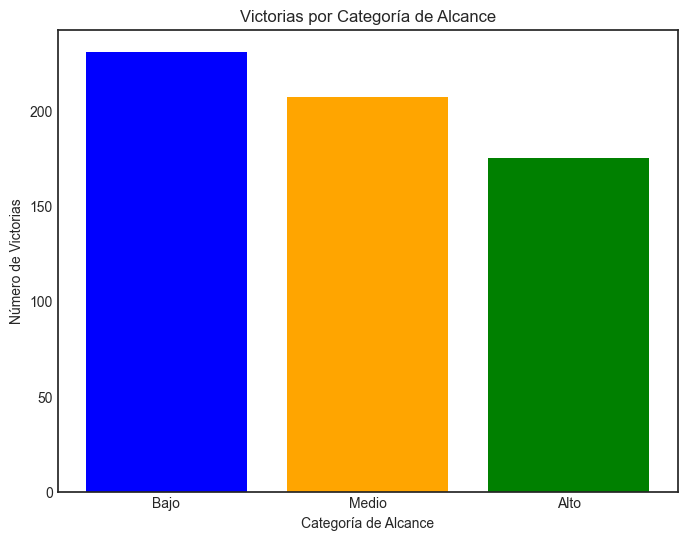

In [285]:
# Categorizar el alcance
resultados_limpios['Alcance_Categoria'] = pd.cut(resultados_limpios['Alcance_Ganador'], bins=[0, 180, 190, 200], labels=['Bajo', 'Medio', 'Alto'])

# Contar victorias
victorias_alcance = resultados_limpios['Alcance_Categoria'].value_counts().reset_index()
victorias_alcance.columns = ['Alcance', 'Victorias']

# Gráfico de barras apiladas
plt.figure(figsize=(8, 6))
plt.bar(victorias_alcance['Alcance'], victorias_alcance['Victorias'], color=['blue', 'orange', 'green'])
plt.title('Victorias por Categoría de Alcance')
plt.xlabel('Categoría de Alcance')
plt.ylabel('Número de Victorias')
plt.show()



 <span style="color:red">Hacer la visualizacion de los paises en el mapa
</span>.